In [ ]:
#pip install xgboost

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [ ]:
# Load the dataset
df = pd.read_excel("DataClasses_1.xlsx")  # Replace with your dataset file path
df

,Asphalt Layer (cm),ROW (m),ADT (veh/day),Heavy Duty %,No. of Lanes,Age (year),Class,1. Alligator Cracking,2. Bleeding,3. Block Cracking,...,10. Long & Trans Cracking,11. Patching & Util Cut Patching,12. Polished Aggregate,13. Potholes,14. Railroad Crossing,15. Rutting,16. Shoving,17. Slippage Cracking,18. Swell,19. Weathering and Raveling
0,7,15,16000,2.1,2,11,Good,NaN,NaN,NaN,...,low,NaN,NaN,low,NaN,NaN,low,NaN,NaN,NaN
1,7,15,16000,2.1,2,11,Good,NaN,NaN,NaN,...,low,low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,15,16000,2.1,2,11,Good,NaN,NaN,NaN,...,NaN,low,NaN,NaN,NaN,NaN,medium,NaN,NaN,NaN
3,7,15,16000,2.1,2,11,Good,NaN,NaN,NaN,...,low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7,15,16000,2.1,2,11,Good,NaN,NaN,NaN,...,low,low,NaN,NaN,NaN,NaN,low,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,10,25,18000,3.8,4,7,Good,NaN,NaN,NaN,...,NaN,low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,10,25,18000,3.8,4,7,Good,NaN,NaN,NaN,...,NaN,NaN,NaN,medium,NaN,NaN,NaN,NaN,NaN,NaN
195,10,25,18000,3.8,4,7,Good,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,10,25,18000,3.8,4,7,Good,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Step 1: Delete features (columns) where more than 95% values are missing
#threshold = 1 * len(df)
#df = df.dropna(thresh=threshold, axis=1)
#df
df = df.dropna(axis=1, how='all')
df

,Asphalt Layer (cm),ROW (m),ADT (veh/day),Heavy Duty %,No. of Lanes,Age (year),Class,1. Alligator Cracking,2. Bleeding,3. Block Cracking,...,9. Lane/Shoulder Drop Off,10. Long & Trans Cracking,11. Patching & Util Cut Patching,12. Polished Aggregate,13. Potholes,15. Rutting,16. Shoving,17. Slippage Cracking,18. Swell,19. Weathering and Raveling
0,7,15,16000,2.1,2,11,Good,NaN,NaN,NaN,...,NaN,low,NaN,NaN,low,NaN,low,NaN,NaN,NaN
1,7,15,16000,2.1,2,11,Good,NaN,NaN,NaN,...,NaN,low,low,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,15,16000,2.1,2,11,Good,NaN,NaN,NaN,...,NaN,NaN,low,NaN,NaN,NaN,medium,NaN,NaN,NaN
3,7,15,16000,2.1,2,11,Good,NaN,NaN,NaN,...,NaN,low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7,15,16000,2.1,2,11,Good,NaN,NaN,NaN,...,NaN,low,low,NaN,NaN,NaN,low,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,10,25,18000,3.8,4,7,Good,NaN,NaN,NaN,...,NaN,NaN,low,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,10,25,18000,3.8,4,7,Good,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,medium,NaN,NaN,NaN,NaN,NaN
195,10,25,18000,3.8,4,7,Good,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,10,25,18000,3.8,4,7,Good,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Step 2: Define the target variable and feature set
target = "Class"
X = df.drop(columns=[target])  # Features
y = df[target]  # Target variable

# Encode categorical target variable if necessary
#if df[target].dtype == "object":
#    label_encoder = LabelEncoder()
#    y = label_encoder.fit_transform(y)

X

,Asphalt Layer (cm),ROW (m),ADT (veh/day),Heavy Duty %,No. of Lanes,Age (year),1. Alligator Cracking,2. Bleeding,3. Block Cracking,4. Bumps and Sags,...,9. Lane/Shoulder Drop Off,10. Long & Trans Cracking,11. Patching & Util Cut Patching,12. Polished Aggregate,13. Potholes,15. Rutting,16. Shoving,17. Slippage Cracking,18. Swell,19. Weathering and Raveling
0,7,15,16000,2.1,2,11,NaN,NaN,NaN,NaN,...,NaN,low,NaN,NaN,low,NaN,low,NaN,NaN,NaN
1,7,15,16000,2.1,2,11,NaN,NaN,NaN,NaN,...,NaN,low,low,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,15,16000,2.1,2,11,NaN,NaN,NaN,NaN,...,NaN,NaN,low,NaN,NaN,NaN,medium,NaN,NaN,NaN
3,7,15,16000,2.1,2,11,NaN,NaN,NaN,NaN,...,NaN,low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7,15,16000,2.1,2,11,NaN,NaN,NaN,NaN,...,NaN,low,low,NaN,NaN,NaN,low,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,10,25,18000,3.8,4,7,NaN,NaN,NaN,NaN,...,NaN,NaN,low,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,10,25,18000,3.8,4,7,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,medium,NaN,NaN,NaN,NaN,NaN
195,10,25,18000,3.8,4,7,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,10,25,18000,3.8,4,7,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Step 3: Create figures for numerical and categorical variables
numerical_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object", "category"]).columns

# Plot histograms for numerical features
#fig, axes = plt.subplots(len(numerical_features), 1, figsize=(8, 5 * len(numerical_features)))
#for i, col in enumerate(numerical_features):
#    sns.histplot(X[col], kde=True, bins=30, ax=axes[i])
#    axes[i].set_title(f"Distribution of {col}")
#plt.tight_layout()
#plt.show()

In [ ]:
X[categorical_features] = X[categorical_features].fillna("No Crack")
X

,Asphalt Layer (cm),ROW (m),ADT (veh/day),Heavy Duty %,No. of Lanes,Age (year),1. Alligator Cracking,2. Bleeding,3. Block Cracking,4. Bumps and Sags,...,9. Lane/Shoulder Drop Off,10. Long & Trans Cracking,11. Patching & Util Cut Patching,12. Polished Aggregate,13. Potholes,15. Rutting,16. Shoving,17. Slippage Cracking,18. Swell,19. Weathering and Raveling
0,7,15,16000,2.1,2,11,No Crack,No Crack,No Crack,No Crack,...,No Crack,low,No Crack,No Crack,low,No Crack,low,No Crack,No Crack,No Crack
1,7,15,16000,2.1,2,11,No Crack,No Crack,No Crack,No Crack,...,No Crack,low,low,No Crack,No Crack,No Crack,No Crack,No Crack,No Crack,No Crack
2,7,15,16000,2.1,2,11,No Crack,No Crack,No Crack,No Crack,...,No Crack,No Crack,low,No Crack,No Crack,No Crack,medium,No Crack,No Crack,No Crack
3,7,15,16000,2.1,2,11,No Crack,No Crack,No Crack,No Crack,...,No Crack,low,No Crack,No Crack,No Crack,No Crack,No Crack,No Crack,No Crack,No Crack
4,7,15,16000,2.1,2,11,No Crack,No Crack,No Crack,No Crack,...,No Crack,low,low,No Crack,No Crack,No Crack,low,No Crack,No Crack,No Crack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,10,25,18000,3.8,4,7,No Crack,No Crack,No Crack,No Crack,...,No Crack,No Crack,low,No Crack,No Crack,No Crack,No Crack,No Crack,No Crack,No Crack
194,10,25,18000,3.8,4,7,No Crack,No Crack,No Crack,No Crack,...,No Crack,No Crack,No Crack,No Crack,medium,No Crack,No Crack,No Crack,No Crack,No Crack
195,10,25,18000,3.8,4,7,No Crack,No Crack,No Crack,No Crack,...,No Crack,No Crack,No Crack,No Crack,No Crack,No Crack,No Crack,No Crack,No Crack,No Crack
196,10,25,18000,3.8,4,7,No Crack,No Crack,No Crack,No Crack,...,No Crack,No Crack,No Crack,No Crack,No Crack,No Crack,No Crack,No Crack,No Crack,No Crack


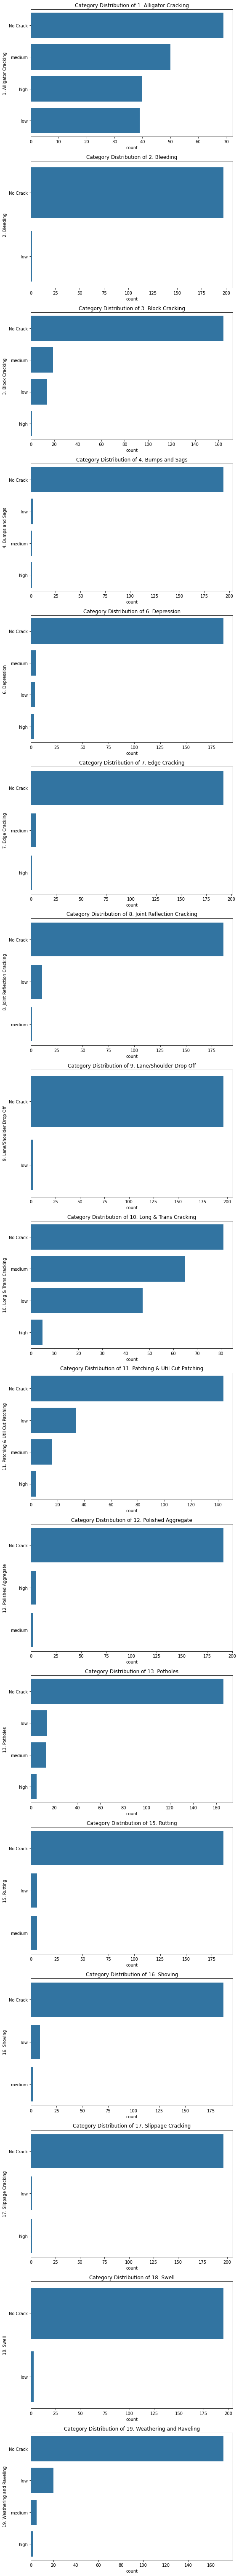

In [ ]:
# Plot ordered bar charts for categorical features
fig, axes = plt.subplots(len(categorical_features), 1, figsize=(8, 5 * len(categorical_features)))
for i, col in enumerate(categorical_features):
    order = X[col].value_counts().index
    sns.countplot(y=X[col], order=order, ax=axes[i])
    axes[i].set_title(f"Category Distribution of {col}")
plt.tight_layout()
plt.show()

In [ ]:
categorical_features

Index(['1. Alligator Cracking', '2. Bleeding', '3. Block Cracking',
       '4. Bumps and Sags', '6. Depression', '7. Edge Cracking',
       '8. Joint Reflection Cracking', '9. Lane/Shoulder Drop Off',
       '10. Long & Trans Cracking', '11. Patching & Util Cut Patching',
       '12. Polished Aggregate', '13. Potholes', '15. Rutting', '16. Shoving',
       '17. Slippage Cracking', '18. Swell', '19. Weathering and Raveling'],
      dtype='object')

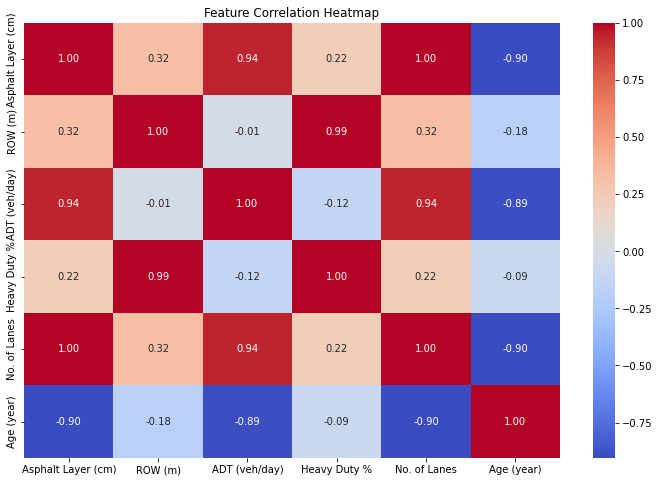

In [ ]:
# Step 4: Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
# Encode categorical target variable if necessary
from sklearn.preprocessing import OrdinalEncoder

# Apply OrdinalEncoder to categorical columns
ordinal_encoder = OrdinalEncoder()
X[categorical_features] = ordinal_encoder.fit_transform(X[categorical_features])
X

,Asphalt Layer (cm),ROW (m),ADT (veh/day),Heavy Duty %,No. of Lanes,Age (year),1. Alligator Cracking,2. Bleeding,3. Block Cracking,4. Bumps and Sags,...,9. Lane/Shoulder Drop Off,10. Long & Trans Cracking,11. Patching & Util Cut Patching,12. Polished Aggregate,13. Potholes,15. Rutting,16. Shoving,17. Slippage Cracking,18. Swell,19. Weathering and Raveling
0,7,15,16000,2.1,2,11,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0
1,7,15,16000,2.1,2,11,0.0,0.0,0.0,0.0,...,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7,15,16000,2.1,2,11,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
3,7,15,16000,2.1,2,11,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7,15,16000,2.1,2,11,0.0,0.0,0.0,0.0,...,0.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,10,25,18000,3.8,4,7,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
194,10,25,18000,3.8,4,7,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
195,10,25,18000,3.8,4,7,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
196,10,25,18000,3.8,4,7,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X['10. Long & Trans Cracking'].unique()

array([2., 0., 3., 1.])

In [ ]:
# Step 5: Build a Random Forest Classifier with 5-fold Cross Validation
rf_model = RandomForestClassifier(n_estimators=500, random_state=42)
rf_predictions = cross_val_predict(rf_model, X, y, cv=5)

# Step 6: Report classification metrics for Random Forest
print("Random Forest Classifier Metrics:")
print(classification_report(y, rf_predictions))

Random Forest Classifier Metrics:
              precision    recall  f1-score   support

        Fair       0.39      0.56      0.46        43
        Good       0.72      0.75      0.74        67
  Impassable       0.40      0.44      0.42        18
        Poor       0.43      0.30      0.35        30
Satisfactory       0.46      0.30      0.36        40

    accuracy                           0.52       198
   macro avg       0.48      0.47      0.47       198
weighted avg       0.52      0.52      0.51       198



/var/folders/bb/xhfn4wps6hnfpvbkvq9_34100000gp/T/ipykernel_22187/3728498719.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y=feature_importance.index, palette="viridis")


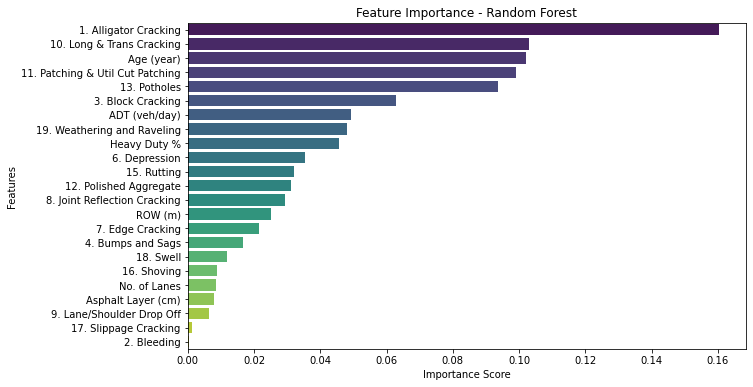

In [ ]:
# Step 7: Visualize Feature Importance for Random Forest
rf_model.fit(X, y)
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette="viridis")
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

In [ ]:
# Encode categorical target variable if necessary
if df[target].dtype == "object":
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)


In [ ]:
# Step 8: Build an XGBoost Classifier with 5-fold Cross Validation
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)
xgb_predictions = cross_val_predict(xgb_model, X, y, cv=5)

# Step 9: Report classification metrics for XGBoost
print("XGBoost Classifier Metrics:")
print(classification_report(y, xgb_predictions))

/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [01:10:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [01:10:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [01:10:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classifier Metrics:
              precision    recall  f1-score   support

           0       0.36      0.42      0.39        43
           1       0.76      0.63      0.69        67
           2       0.22      0.39      0.28        18
           3       0.33      0.33      0.33        30
           4       0.45      0.35      0.39        40

    accuracy                           0.46       198
   macro avg       0.43      0.42      0.42       198
weighted avg       0.50      0.46      0.47       198



/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [01:10:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [01:10:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 10: Build and train Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Step 11: Present Logistic Regression Results
logreg_predictions = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
logreg_recall = recall_score(y_test, logreg_predictions, average='micro')
logreg_precision = precision_score(y_test, logreg_predictions, average='micro')
logreg_f1 = f1_score(y_test, logreg_predictions, average='micro')

print(f"\nLogistic Regression Results:")
print(f"Accuracy: {logreg_accuracy:.2f}")
print(f"Recall: {logreg_recall:.2f}")
print(f"Precision: {logreg_precision:.2f}")
print(f"F1 Score: {logreg_f1:.2f}")


Logistic Regression Results:
Accuracy: 0.45
Recall: 0.45
Precision: 0.45
F1 Score: 0.45


In [ ]:
# Define the threshold
threshold = 0.80

Xt = X.copy()

# Calculate the proportion of "No Crack" in each categorical column
no_crack_ratio = (Xt == 0).sum() / Xt.shape[0]

# Identify columns where "No Crack" appears in more than 95% of values
cols_to_drop = no_crack_ratio[no_crack_ratio > threshold].index

# Drop those columns
Xt = Xt.drop(columns=cols_to_drop)

# Print dropped columns for verification
print("Dropped columns:", cols_to_drop)

Dropped columns: Index(['2. Bleeding', '3. Block Cracking', '4. Bumps and Sags',
       '6. Depression', '7. Edge Cracking', '8. Joint Reflection Cracking',
       '9. Lane/Shoulder Drop Off', '12. Polished Aggregate', '13. Potholes',
       '15. Rutting', '16. Shoving', '17. Slippage Cracking', '18. Swell',
       '19. Weathering and Raveling'],
      dtype='object')


In [ ]:
# Step 5: Build a Random Forest Classifier with 5-fold Cross Validation
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_predictions = cross_val_predict(rf_model, Xt, y, cv=5)

# Step 6: Report classification metrics for Random Forest
print("Random Forest Classifier Metrics:")
print(classification_report(y, rf_predictions))

Random Forest Classifier Metrics:
              precision    recall  f1-score   support

        Fair       0.38      0.56      0.45        43
        Good       0.71      0.75      0.73        67
  Impassable       0.19      0.39      0.26        18
        Poor       0.38      0.17      0.23        30
Satisfactory       0.33      0.12      0.18        40

    accuracy                           0.46       198
   macro avg       0.40      0.40      0.37       198
weighted avg       0.47      0.46      0.44       198



/var/folders/bb/xhfn4wps6hnfpvbkvq9_34100000gp/T/ipykernel_22187/2508115286.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y=feature_importance.index, palette="viridis")


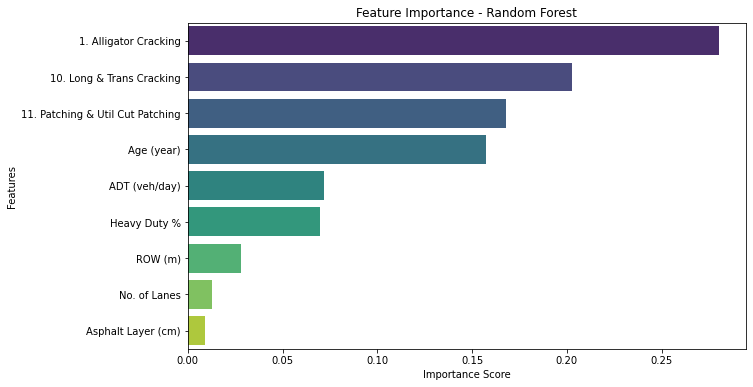

In [ ]:
# Step 7: Visualize Feature Importance for Random Forest
rf_model.fit(Xt, y)
feature_importance = pd.Series(rf_model.feature_importances_, index=Xt.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette="viridis")
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

In [ ]:
# Define a threshold (e.g., keep only features with importance > 0.01)
threshold = 0.04
important_features = feature_importance[feature_importance > threshold].index

Xi = X.copy()

# Drop low-importance features
Xi = Xi[important_features]

# Print dropped columns for verification
dropped_features = feature_importance[feature_importance <= threshold].index
print("Dropped features:", list(dropped_features))

Dropped features: ['6. Depression', '15. Rutting', '12. Polished Aggregate', '8. Joint Reflection Cracking', 'ROW (m)', '7. Edge Cracking', '4. Bumps and Sags', '18. Swell', '16. Shoving', 'No. of Lanes', 'Asphalt Layer (cm)', '9. Lane/Shoulder Drop Off', '17.\xa0Slippage Cracking', '2. Bleeding']


In [ ]:
# Step 5: Build a Random Forest Classifier with 5-fold Cross Validation
rf_model = RandomForestClassifier(n_estimators=500, random_state=42)
rf_predictions = cross_val_predict(rf_model, Xi, y, cv=5)

# Step 6: Report classification metrics for Random Forest
print("Random Forest Classifier Metrics:")
print(classification_report(y, rf_predictions))

Random Forest Classifier Metrics:
              precision    recall  f1-score   support

        Fair       0.35      0.53      0.42        43
        Good       0.72      0.75      0.74        67
  Impassable       0.26      0.39      0.31        18
        Poor       0.25      0.17      0.20        30
Satisfactory       0.56      0.23      0.32        40

    accuracy                           0.47       198
   macro avg       0.43      0.41      0.40       198
weighted avg       0.50      0.47      0.46       198



In [ ]:
#pip install threadpoolctl -U

In [ ]:
#from imblearn.over_sampling import SMOTE
#from collections import Counter

#counter = Counter(y)
#print('Before', counter)

# oversampling the train dataset using SMOTE
#smt = SMOTE()
#Xsmt, ysmt = smt.fit_resample(X, y)

#counter = Counter(ysmt)
#print('After', counter)

In [ ]:
Xd = X.copy()
yd = y.copy()

Xd = Xd.append(Xd, ignore_index=True)
yd = yd.append(yd, ignore_index=True)
Xd

/var/folders/bb/xhfn4wps6hnfpvbkvq9_34100000gp/T/ipykernel_22187/1185269104.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Xd = Xd.append(Xd, ignore_index=True)
/var/folders/bb/xhfn4wps6hnfpvbkvq9_34100000gp/T/ipykernel_22187/1185269104.py:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yd = pd.concat([yd, yd], ignore_index=True)


,Asphalt Layer (cm),ROW (m),ADT (veh/day),Heavy Duty %,No. of Lanes,Age (year),1. Alligator Cracking,2. Bleeding,3. Block Cracking,4. Bumps and Sags,...,9. Lane/Shoulder Drop Off,10. Long & Trans Cracking,11. Patching & Util Cut Patching,12. Polished Aggregate,13. Potholes,15. Rutting,16. Shoving,17. Slippage Cracking,18. Swell,19. Weathering and Raveling
0,7,15,16000,2.1,2,11,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0
1,7,15,16000,2.1,2,11,0.0,0.0,0.0,0.0,...,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7,15,16000,2.1,2,11,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
3,7,15,16000,2.1,2,11,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7,15,16000,2.1,2,11,0.0,0.0,0.0,0.0,...,0.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,10,25,18000,3.8,4,7,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
392,10,25,18000,3.8,4,7,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
393,10,25,18000,3.8,4,7,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
394,10,25,18000,3.8,4,7,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Step 5: Build a Random Forest Classifier with 5-fold Cross Validation
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_predictions = cross_val_predict(rf_model, Xd, yd, cv=5)

# Step 6: Report classification metrics for Random Forest
print("Random Forest Classifier Metrics:")
print(classification_report(yd, rf_predictions))

Random Forest Classifier Metrics:
              precision    recall  f1-score   support

        Fair       0.62      0.87      0.72        86
        Good       0.94      0.93      0.94       134
  Impassable       0.89      0.92      0.90        36
        Poor       0.69      0.55      0.61        60
Satisfactory       0.93      0.66      0.77        80

    accuracy                           0.81       396
   macro avg       0.81      0.79      0.79       396
weighted avg       0.83      0.81      0.81       396



In [ ]:
Xdd = Xd.copy()
ydd = yd.copy()

Xdd = Xdd.append(Xdd, ignore_index=True)
ydd = ydd.append(ydd, ignore_index=True)
Xdd

/var/folders/bb/xhfn4wps6hnfpvbkvq9_34100000gp/T/ipykernel_22187/867960523.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Xdd = Xdd.append(Xdd, ignore_index=True)
/var/folders/bb/xhfn4wps6hnfpvbkvq9_34100000gp/T/ipykernel_22187/867960523.py:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ydd = ydd.append(ydd, ignore_index=True)


,Asphalt Layer (cm),ROW (m),ADT (veh/day),Heavy Duty %,No. of Lanes,Age (year),1. Alligator Cracking,2. Bleeding,3. Block Cracking,4. Bumps and Sags,...,9. Lane/Shoulder Drop Off,10. Long & Trans Cracking,11. Patching & Util Cut Patching,12. Polished Aggregate,13. Potholes,15. Rutting,16. Shoving,17. Slippage Cracking,18. Swell,19. Weathering and Raveling
0,7,15,16000,2.1,2,11,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0
1,7,15,16000,2.1,2,11,0.0,0.0,0.0,0.0,...,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7,15,16000,2.1,2,11,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
3,7,15,16000,2.1,2,11,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7,15,16000,2.1,2,11,0.0,0.0,0.0,0.0,...,0.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,10,25,18000,3.8,4,7,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
788,10,25,18000,3.8,4,7,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
789,10,25,18000,3.8,4,7,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
790,10,25,18000,3.8,4,7,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Step 5: Build a Random Forest Classifier with 5-fold Cross Validation
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_predictions = cross_val_predict(rf_model, Xdd, ydd, cv=5)

# Step 6: Report classification metrics for Random Forest
print("Random Forest Classifier Metrics:")
print(classification_report(ydd, rf_predictions))

Random Forest Classifier Metrics:
              precision    recall  f1-score   support

        Fair       0.63      0.85      0.72       172
        Good       0.95      0.93      0.94       268
  Impassable       0.92      0.94      0.93        72
        Poor       0.72      0.62      0.66       120
Satisfactory       0.90      0.70      0.79       160

    accuracy                           0.82       792
   macro avg       0.83      0.81      0.81       792
weighted avg       0.83      0.82      0.82       792



/var/folders/bb/xhfn4wps6hnfpvbkvq9_34100000gp/T/ipykernel_22187/1391424155.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=feature_importance.values, y=feature_importance.index, palette="viridis")


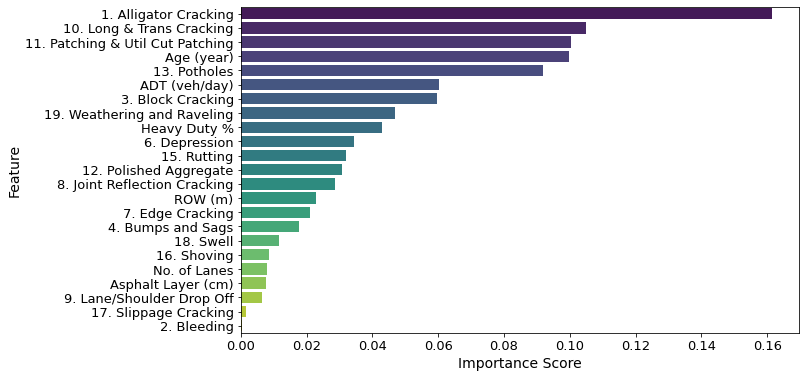

In [ ]:
# Step 7: Visualize Feature Importance for Random Forest
rf_model.fit(X, y)
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
FI = plt.figure(figsize=(10, 6))
ax = sns.barplot(x=feature_importance.values, y=feature_importance.index, palette="viridis")
ax.set_xlabel('Importance Score',fontsize=14)
ax.set_ylabel('Feature',fontsize=14)
ax.tick_params(axis='both', labelsize=13)
FI.savefig("feature_importance.png", dpi=300, bbox_inches='tight')  # PNG format
plt.show()

In [ ]:
# Encode categorical target variable if necessary
label_encoder = LabelEncoder()
yddx = label_encoder.fit_transform(ydd)


# Step 8: Build an XGBoost Classifier with 5-fold Cross Validation
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)
xgb_predictions = cross_val_predict(xgb_model, Xdd, yddx, cv=5)

# Step 9: Report classification metrics for XGBoost
print("XGBoost Classifier Metrics:")
print(classification_report(yddx, xgb_predictions))

/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [02:25:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [02:25:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [02:25:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [02:25:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/x

XGBoost Classifier Metrics:
              precision    recall  f1-score   support

           0       0.63      0.85      0.73       172
           1       0.93      0.94      0.93       268
           2       0.90      0.97      0.93        72
           3       0.71      0.62      0.67       120
           4       0.99      0.65      0.78       160

    accuracy                           0.82       792
   macro avg       0.83      0.81      0.81       792
weighted avg       0.84      0.82      0.82       792



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Xdd, ydd, test_size=0.3, random_state=42)

# Step 10: Build and train Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Step 11: Present Logistic Regression Results
logreg_predictions = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
logreg_recall = recall_score(y_test, logreg_predictions, average='micro')
logreg_precision = precision_score(y_test, logreg_predictions, average='micro')
logreg_f1 = f1_score(y_test, logreg_predictions, average='micro')

print(f"\nLogistic Regression Results:")
print(f"Accuracy: {logreg_accuracy:.2f}")
print(f"Recall: {logreg_recall:.2f}")
print(f"Precision: {logreg_precision:.2f}")
print(f"F1 Score: {logreg_f1:.2f}")


Logistic Regression Results:
Accuracy: 0.53
Recall: 0.53
Precision: 0.53
F1 Score: 0.53


In [ ]:
# Define the threshold
threshold = 0.0

Xt = Xdd.copy()

# Calculate the proportion of "No Crack" in each categorical column
no_crack_ratio = (Xt == 0).sum() / Xt.shape[0]

# Identify columns where "No Crack" appears in more than 95% of values
cols_to_drop = no_crack_ratio[no_crack_ratio > threshold].index

# Drop those columns
Xt = Xt.drop(columns=cols_to_drop)

# Print dropped columns for verification
print("Dropped columns:", cols_to_drop)

Dropped columns: Index(['1. Alligator Cracking', '2. Bleeding', '3. Block Cracking',
       '4. Bumps and Sags', '6. Depression', '7. Edge Cracking',
       '8. Joint Reflection Cracking', '9. Lane/Shoulder Drop Off',
       '10. Long & Trans Cracking', '11. Patching & Util Cut Patching',
       '12. Polished Aggregate', '13. Potholes', '15. Rutting', '16. Shoving',
       '17. Slippage Cracking', '18. Swell', '19. Weathering and Raveling'],
      dtype='object')


In [ ]:
# Step 5: Build a Random Forest Classifier with 5-fold Cross Validation
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_predictions = cross_val_predict(rf_model, Xt, ydd, cv=5)

# Step 6: Report classification metrics for Random Forest
print("Random Forest Classifier Metrics:")
print(classification_report(ydd, rf_predictions))

Random Forest Classifier Metrics:
              precision    recall  f1-score   support

        Fair       0.40      0.70      0.51       172
        Good       0.75      0.81      0.78       268
  Impassable       0.25      0.72      0.38        72
        Poor       0.00      0.00      0.00       120
Satisfactory       0.00      0.00      0.00       160

    accuracy                           0.49       792
   macro avg       0.28      0.45      0.33       792
weighted avg       0.36      0.49      0.41       792



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
